In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [2]:
runtimes = pd.DataFrame({
    "rain": "no_rain",
    "decay": "no_decay",
    "memilio_sim": "pop8",
    "Reading": 3+28/60,
    "Calculate hydraulics": 13,
    "Calculate substances": 2+28/60,
    "Writing": 10/60,
}, index=[0])

runtimes2 = pd.DataFrame({
    "rain": "rain",
    "decay": "decay",
    "memilio_sim": "pop8",
    "Reading": 3+12/60,
    "Calculate hydraulics": 12,
    "Calculate substances": 5+24/60,
    "Writing": 8/60,
}, index=[1])

runtimes3 = pd.DataFrame({
    "rain": "rain",
    "decay": "decay",
    "memilio_sim": "pop8_local",
    "Reading": 7+21/60,
    "Calculate hydraulics": 12,
    "Calculate substances": 5+32/60,
    "Writing": 8/60,
}, index=[2])

runtimes4 = pd.DataFrame({
    "rain": "rain",
    "decay": "no_decay",
    "memilio_sim": "pop8",
    "Reading": 3+12/60,
    "Calculate hydraulics": 11,
    "Calculate substances": 3+43/60,
    "Writing": 8/60,
}, index=[3])


In [3]:
runtimes_long = pd.concat([runtimes, runtimes2, runtimes3, runtimes4], axis=0).melt(id_vars=["rain", "decay", "memilio_sim"])

In [4]:
runtimes_long.head()

,rain,decay,memilio_sim,variable,value
0,no_rain,no_decay,pop8,Reading,3.466667
1,rain,decay,pop8,Reading,3.200000
2,rain,decay,pop8_local,Reading,7.350000
3,rain,no_decay,pop8,Reading,3.200000
4,no_rain,no_decay,pop8,Calculate hydraulics,13.000000


In [5]:
runtimes_sub = runtimes_long.loc[(runtimes_long.memilio_sim=="pop8")&(runtimes_long.decay=="no_decay")]

In [6]:
runtimes_sub.variable = runtimes_sub.variable.apply(lambda x: x.replace(" ", "\n"))
runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x.replace("_", " "))
runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x.replace("rain", "precipitation"))
runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x[0].upper() + x[1:] if x else x)

/tmp/ipykernel_17400/2276806194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtimes_sub.variable = runtimes_sub.variable.apply(lambda x: x.replace(" ", "\n"))
/tmp/ipykernel_17400/2276806194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x.replace("_", " "))
/tmp/ipykernel_17400/2276806194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

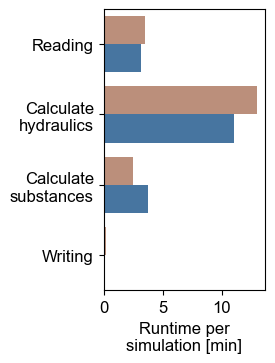

In [16]:
fig, ax = plt.subplots(figsize=(3, 3.89))  # Swap width/height for vertical space

barplot = sns.barplot(
    data=runtimes_sub,
    x="value",                  # Now the quantitative variable
    y="variable",               # Now the categorical variable
    hue="rain",
    palette={"Precipitation": blue, "No precipitation": tan},
    ax=ax,
    legend=None,
    orient="h"                  # Explicitly set horizontal orientation
)

ax.set_xlabel("Runtime per\nsimulation [min]", fontdict={"fontsize": 15*0.8})
ax.set_ylabel("")
#ax.legend(title=None)

plt.tight_layout()
plt.savefig(
    os.path.join("..", "plots", "pop8", "runtime_visualization_horizontal.png"),
    bbox_inches="tight",
    dpi=300
)
